<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Привет еще раз. Спасибо, что доделал работу. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация. 

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет! Спасибо, что прислал задание:) Меня зовут Слепцов Артем и я буду проверять твой проект) Ты проделал большую работу над проектом, однако его еще можно улучшить. Будет здорово, если ты, надеюсь, не против, если я буду на ты, будешь отвечать на комментарии и участвовать в диалоге. 

Мои комментарии обозначены пометкой **Комментарий ревьюера**. Далее в файле ты сможешь найти их в похожих ячейках (если фон комментария <font color=green>зелёный</font> - всё сделано правильно. Рекомендации укажу таким же цветом; <font color=orange>оранжевый</font> - некритичные замечания. Если таких замечаний меньше трех - проект может быть принят без их отработки; <font color=red>красный</font> - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения данного проекта. 
</div>

<br/><font size="7"><b>Проект "Интернет-магазин Стримчик"</b></font><br/>

<br/><a name="0.0"></a>
<font size="6"><b>Содержание</b></font><br/>

* [Описание проекта](#0.1)
* [Этап 1. Получение данных](#1.)
* [Этап 2. Предобработка данных](#2.)
* [Этап 3. Исследовательский анализ данных](#3.)
* [Этап 4. Портет пользователя регионов NA, EU, JP](#4.)
* [Этап 5. Исследование статистических показателей](#5.)
* [Этап 6. Проверка гипотез](#6.)
* [Этап 7. Вывод](#7.)

<br/><a name="0.1"></a>
<font size="6"><b>Описание проекта</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Вступление в работу очень важно. Так ты поясняешь то, чему она посвящена. Цель работы также хорошо бы вынести в отдельный блок вступления. Еще лучше будет, если ты сделаешь план работы с гиперссылками. Да, есть плагин ToC. Но хорошо бы уметь реализовывать интерактивный план проекта вручную. Как это реализовать - смотри по [ссылке](https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook/49717704).

</div>

<br/><a name="1."></a>
<font size="6"><b>Этап 1. Получение данных</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>

<font size="3"><b>Импортируем библиотеки.</b></font>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Я заметил, что ячейки в твоей тетрадке начинаются не с 1. Перед отправкой работы рекомендую перезапускать ноутбук, чтобы убедиться, что все ячейки выполняются корректно.

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Перезапуск позволяет обнаружить и исправить скрытые в коде ошибки. 

</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.stats.api as sms
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Правильно, что весь импорт ты проводишь в первой ячейке работы. Так твой коллега, запускающий работу, будет в курсе используемых в ней библиотек и сможет при необходимости быстро настроить окружение. 

</div>

Прочитаем файл *games.csv* и сохраним в переменной *df*.

In [2]:
df = pd.read_csv('/datasets/games.csv')

Познакомимся с содержанием *DataFrame*.

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Общая информация о *df*.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Всего в таблице 11 столбцов. Тип данных у 6 из них - *float*, у 5 - *object*.

Подробно разберём, какие в df столбцы и какую информацию они содержат:
* *Name* — название игры;
* *Platform* — платформа;
* *Year_of_Release* — год выпуска;
* *Genre* — жанр игры;
* *NA_sales* — продажи в Северной Америке (миллионы долларов);
* *EU_sales* — продажи в Европе (миллионы долларов);
* *JP_sales* — продажи в Японии (миллионы долларов);
* *Other_sales* — продажи в других странах (миллионы долларов);
* *Critic_Score* — оценка критиков (от 0 до 100);
* *User_Score* — оценка пользователей (от 0 до 10);
* *Rating* — рейтинг от организации *ESRB* (англ. *Entertainment Software Rating Board*). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Количество строк различается, это означает что у нас есть пропущенные значения.

Обратим внимание на формат столбцов. Форматы столбцов *Year_of_Release* и *User_Score* не соответствуют их содержанию.

<br/><font size="3"><b>Вывод.</b></font>

Перед нами таблица с данными игр из различных жанров, созданными для различных платформ. Как мы заметили, в датасете есть пропуски и некачественные названия столбцов. Исправим это!

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Подумай также о возможных причинах появления пропусков, а также о том, являются ли они случайными или нет. Можно высказать предварительные варианты их обработки. 

Первый взгляд на таблицу выполнен.

</div>

<br/><a name="2."></a>
<font size="6"><b>Этап 2. Предобработка данных</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>

<font size="3"><b>Проверим названия столбцов на пробелы, опечатки и заглавные буквы.</b></font>

In [5]:
df.columns 

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

В названии столбцов нет пробелов, но все они начинаются с прописной буквы. Тогда просто приведем их к нижнем регистру.

In [6]:
df.columns = df.columns.str.lower()

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Не надо переименовывать столбцы через атрибут columns, потому что так ты неявно учитываешь порядок столбцов. Если порядок столбцов поменяется, код перестанет работать. Используй вместо этого метод rename().
    
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Так мы именно переименовываем столбцы, а не создаем новый набор названий. 

</div>

Проверим результат.

In [7]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<font size="3"><b>Разберёмся с пропусками данных</b></font>

Узнаем количество пропущенных значений в каждом столбце.

In [8]:
df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пустые значения свидетельствуют, что не для всех игр доступен рейтинг, оценка критиков и пользователей, а так же год издания (2 пропуска жанра на результат не влияют).

Обратим внимание на то, что всего в нашей таблице 16715 строк. Т.е. пропуски в столбцах с оценками и рейтингом составляют огромную часть (до 51.3%).

Сначала избавимся от пропусков в столбце *genre*. Это пропуски категориальной переменной, значение которой для данных строк мы никак не можем восстановить.

In [9]:
df['genre'] = df['genre'].fillna('')
df['critic_score'] = pd.to_numeric(df['critic_score'], errors='coerce')

По первым десяти строкам *DataFrame* можно подумать, что рейтинга нет у игр, выпущенных раньше какого-то года. Давайте это проверим!

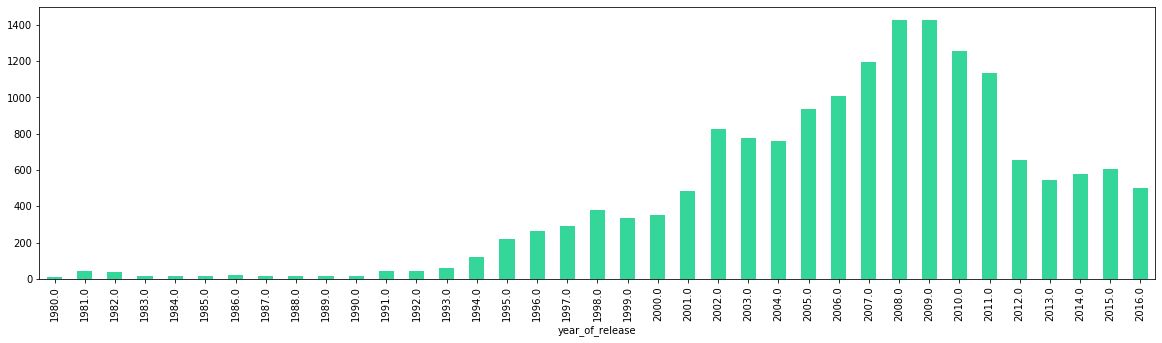

In [10]:
plt.style.use('seaborn-pastel')
df_to_plot = df[df['critic_score'] != 'NaN'].groupby('year_of_release')['year_of_release'].count()
plot = df_to_plot.plot(kind='bar', figsize=(20,5), color='#35D699')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

С предупреждениями также стоит разобраться. Иногда их бывает слишком много, поэтому важно уметь их скрывать. В этом тебе поможет библиотека warnings. Попробуй найти подходящий метод и убрать предупреждения.  

</div>

**Предположение верно.**
<br/>Действительно, наличие рейтинга у игры зависит от даты выпуска. Как можно заметить на графике, до 2000 года оценок практически не было. И чем ближе к 2010 году, тем больше оценок. После 2010 г. количество оценок в общем уменьшается из-за сокращения количества выпускаемых игр.

<br/>Далее изучим детальнее столбец *user_score*. Вызывает подозрение его формат *object*, хотя он должен быть *float* (только числа и *NaN*).

In [11]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Как мы видим, среди других значений есть "tbd". 
<br/>Изучив *FAQ Metacritic'a*, мы узнаем, что это аббревиатура означает *To Be Determined*. Она используется тогда, когда игра имеет недостаточное количество отзывов (менее 4) для подсчета рейтинга пользователей и его публикации.
Т.к. нам необходим числовой столбец, мы заменяем *tbd* на *NaN* (никаких достоверных выводов из нескольких отзывов мы сделать не можем).

In [12]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'] = df['user_score'].astype('float')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Верно, по своей сути tbd и является Nan. Отлично, что определяешь неявные пропущенные значения.

</div>

Следующим шагом заполним пропуски количественных переменных: *ctitic_score*, *user_score*, *rating*.

In [13]:
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce')
df['rating'] = df['rating'].fillna('')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16715 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [14]:
print(df['critic_score'].mean())
print(df['critic_score'].median())

68.96767850559173
71.0


In [15]:
print(df['user_score'].mean())
print(df['user_score'].median())

7.125046113306982
7.5


In [16]:
df[df['critic_score'] == 'NaN'] = df['critic_score'].mean()
df[df['user_score'] == 'NaN'] = df['user_score'].median()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16715 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16715 non-null object
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Заполнение такого числа пропусков в отзывах критиков и пользователей  одним значением может сильно исказить структуры данных столбцов. Данных для того, чтобы восстановить эти пропуски, у нас недостаточно. Также мы видим, что пропуски в столбцах часто встречаются вместе, т.е. нет данных по одним и тем же играм. Это с большой долей вероятности связано с тем, что эти данные просто не были загружены в таблицу. Однако заполнение пропусков у тебя не получилось, т.к. в данных нет строки "Nan". Пропуски стоит оставить в данных, не заполнять нереальными данными, т.к. это сильно скажется на результатах анализа.  

</div>

Проверим значения столбца *platform* на повторы.

In [17]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Повторов нет! Отлично, идем дальше.

Добавим столбец с продажами по всем  регионам.

In [18]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Данные подготовлены! Можно переходить к дальнейшему анализу!

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Да, восстановить пропущенные значения мы не можем. Данных для этого недостаточно. Лучше работать с меньшим количеством данных хорошего качества.
    
Ошибки в данных устранены. Данные подготовлены к дальнейшему анализу. 

</div>

<br/><a name="3."></a>
<font size="6"><b>Этап 3. Исследовательский анализ данных</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>

<font size="3"><b>Посмотрим распределение игр по годам.</b></font>

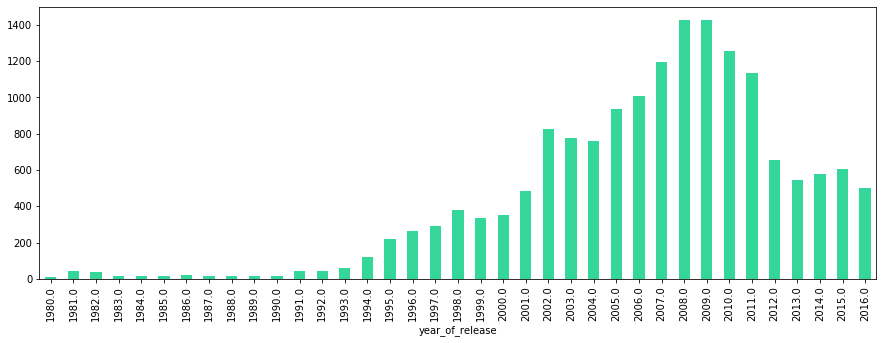

In [19]:
df_to_plot = df.groupby('year_of_release')['name'].count()
plot = df_to_plot.plot(kind='bar', figsize=(15,5), color='#35D699')

До 1994 года и игр практически не было. В 2008 и 2009 годах наблюдается пик, после этого - спад, вероятнее всего связанный с массовым проникновением на рынок мобильных устройств.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Соглашусь с причиной спада в индустрии последних лет.

</div>

<font size="3"><b>Посмотрим количество выпущенных игр по платформам.</b></font>

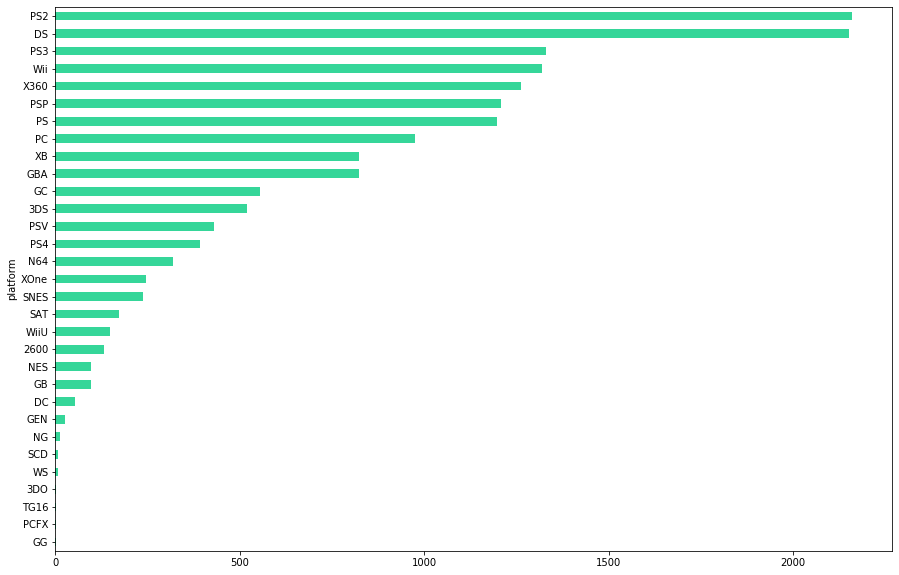

In [20]:
df_to_plot = df.groupby('platform')['name'].count().sort_values(ascending = True)
plot = df_to_plot.plot(kind='barh', figsize=(15,10), color='#35D699')

В тройку лидеров по количеству игр входят *PS2*, *XBOX360* и *PS3*.

<font size="3"><b>Изучим суммарные продажи за весь период у топ-10 платформ.</b></font>

In [21]:
df.groupby('platform')['total_sales'].sum().to_frame('total_sales').sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Выберем **топ-6** платформ. Между ними разница не такая большая, как между 6 и 7 платформами.

In [22]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

<font size="3"><b>Построим изменение продаж наиболее популярных платформ(топ-8).</b></font>

In [23]:
!pip install mplcursors
import mplcursors

Defaulting to user installation because normal site-packages is not writeable


<IPython.core.display.Javascript object>


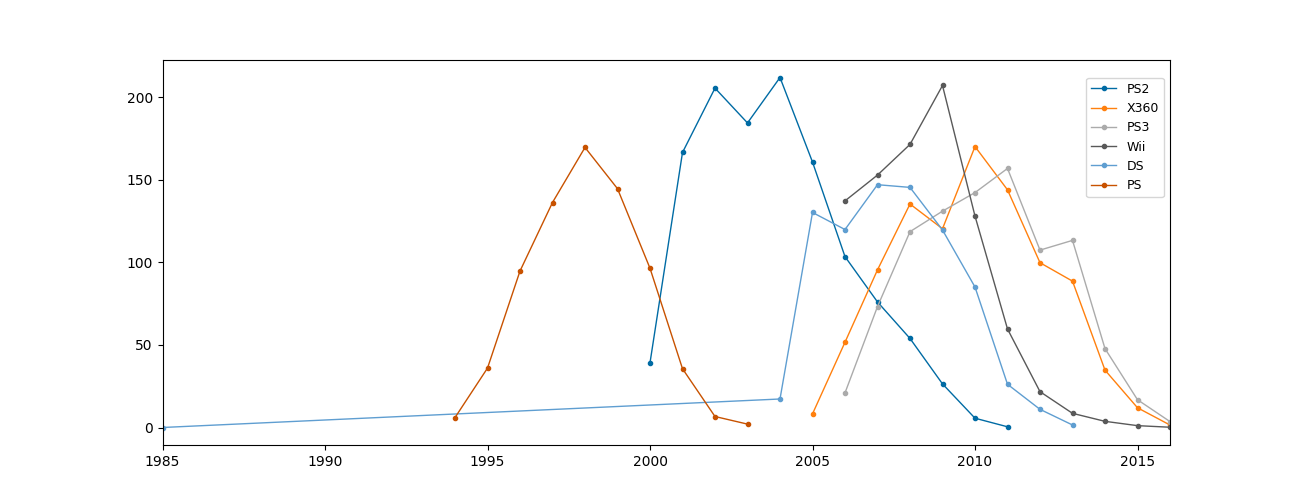

<function __main__.<lambda>(sel)>

In [24]:
%matplotlib notebook
plt.style.use('tableau-colorblind10')
    
ax = plt.gca()
legend_list = []
platforms = top_platforms
bbox_y = 0.97
legend_size = 9
for platform in platforms:
    df_to_plot = df.query('platform == @platform')
    lines = df_to_plot.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales',
                                                                        style='.-', kind='line', fontsize=10,
                                                                    linewidth=1, label=platform, ax=ax, figsize=(13,5))
    legend_list.append(platform)
ax.set_xlabel('')
   
ax.legend(legend_list, prop={'size':legend_size}, bbox_to_anchor=(1.0, bbox_y))

mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_label()))


<font size="3"><b>Посмотрим на среднюю продолжительность жизни платформ.</b></font>

In [25]:
platform_life_length = df.groupby('platform')['year_of_release'].max() - df.groupby('platform')['year_of_release'].min()
platform_life_length

platform
2600     9.0
3DO      1.0
3DS      5.0
DC      10.0
DS      28.0
GB      13.0
GBA      7.0
GC       6.0
GEN      4.0
GG       0.0
N64      6.0
NES     11.0
NG       3.0
PC      31.0
PCFX     0.0
PS       9.0
PS2     11.0
PS3     10.0
PS4      3.0
PSP     11.0
PSV      5.0
SAT      5.0
SCD      1.0
SNES     9.0
TG16     0.0
WS       2.0
Wii     10.0
WiiU     4.0
X360    11.0
XB       8.0
XOne     3.0
Name: year_of_release, dtype: float64

Перед расчётом среднего, избавимся от очевидных выбросов: это *GG*, *PCFX*, *TG16* - у них нулевые значения, что, возможно, обусловлено тем, что это были концепты, эти платформы только вышли или же это провалы с самого старта.
<br/>Так же не совсем корректно оставлять *PC*, так как это исключение из правил. Многие поколения компьютеров (комплектующих) сменяются, а название остается тем же. К тому же сколько бы лет не прошло, мы скорее всего будем продолжать использовать их в том числе и для игры.

In [26]:
platform_life_length_max = df.query('platform not in ("GG", "PCFX", "TG16", "PC")').groupby('platform')['year_of_release'].max()
platform_life_length_min = df.query('platform not in ("GG", "PCFX", "TG16", "PC")').groupby('platform')['year_of_release'].min()
platform_life_length = platform_life_length_max - platform_life_length_min
print('Средняя продолжительность жизни платформы',platform_life_length.mean())
print('Медианная продолжительность жизни платформы',platform_life_length.median())

Средняя продолжительность жизни платформы 7.592592592592593
Медианная продолжительность жизни платформы 7.0


<IPython.core.display.Javascript object>


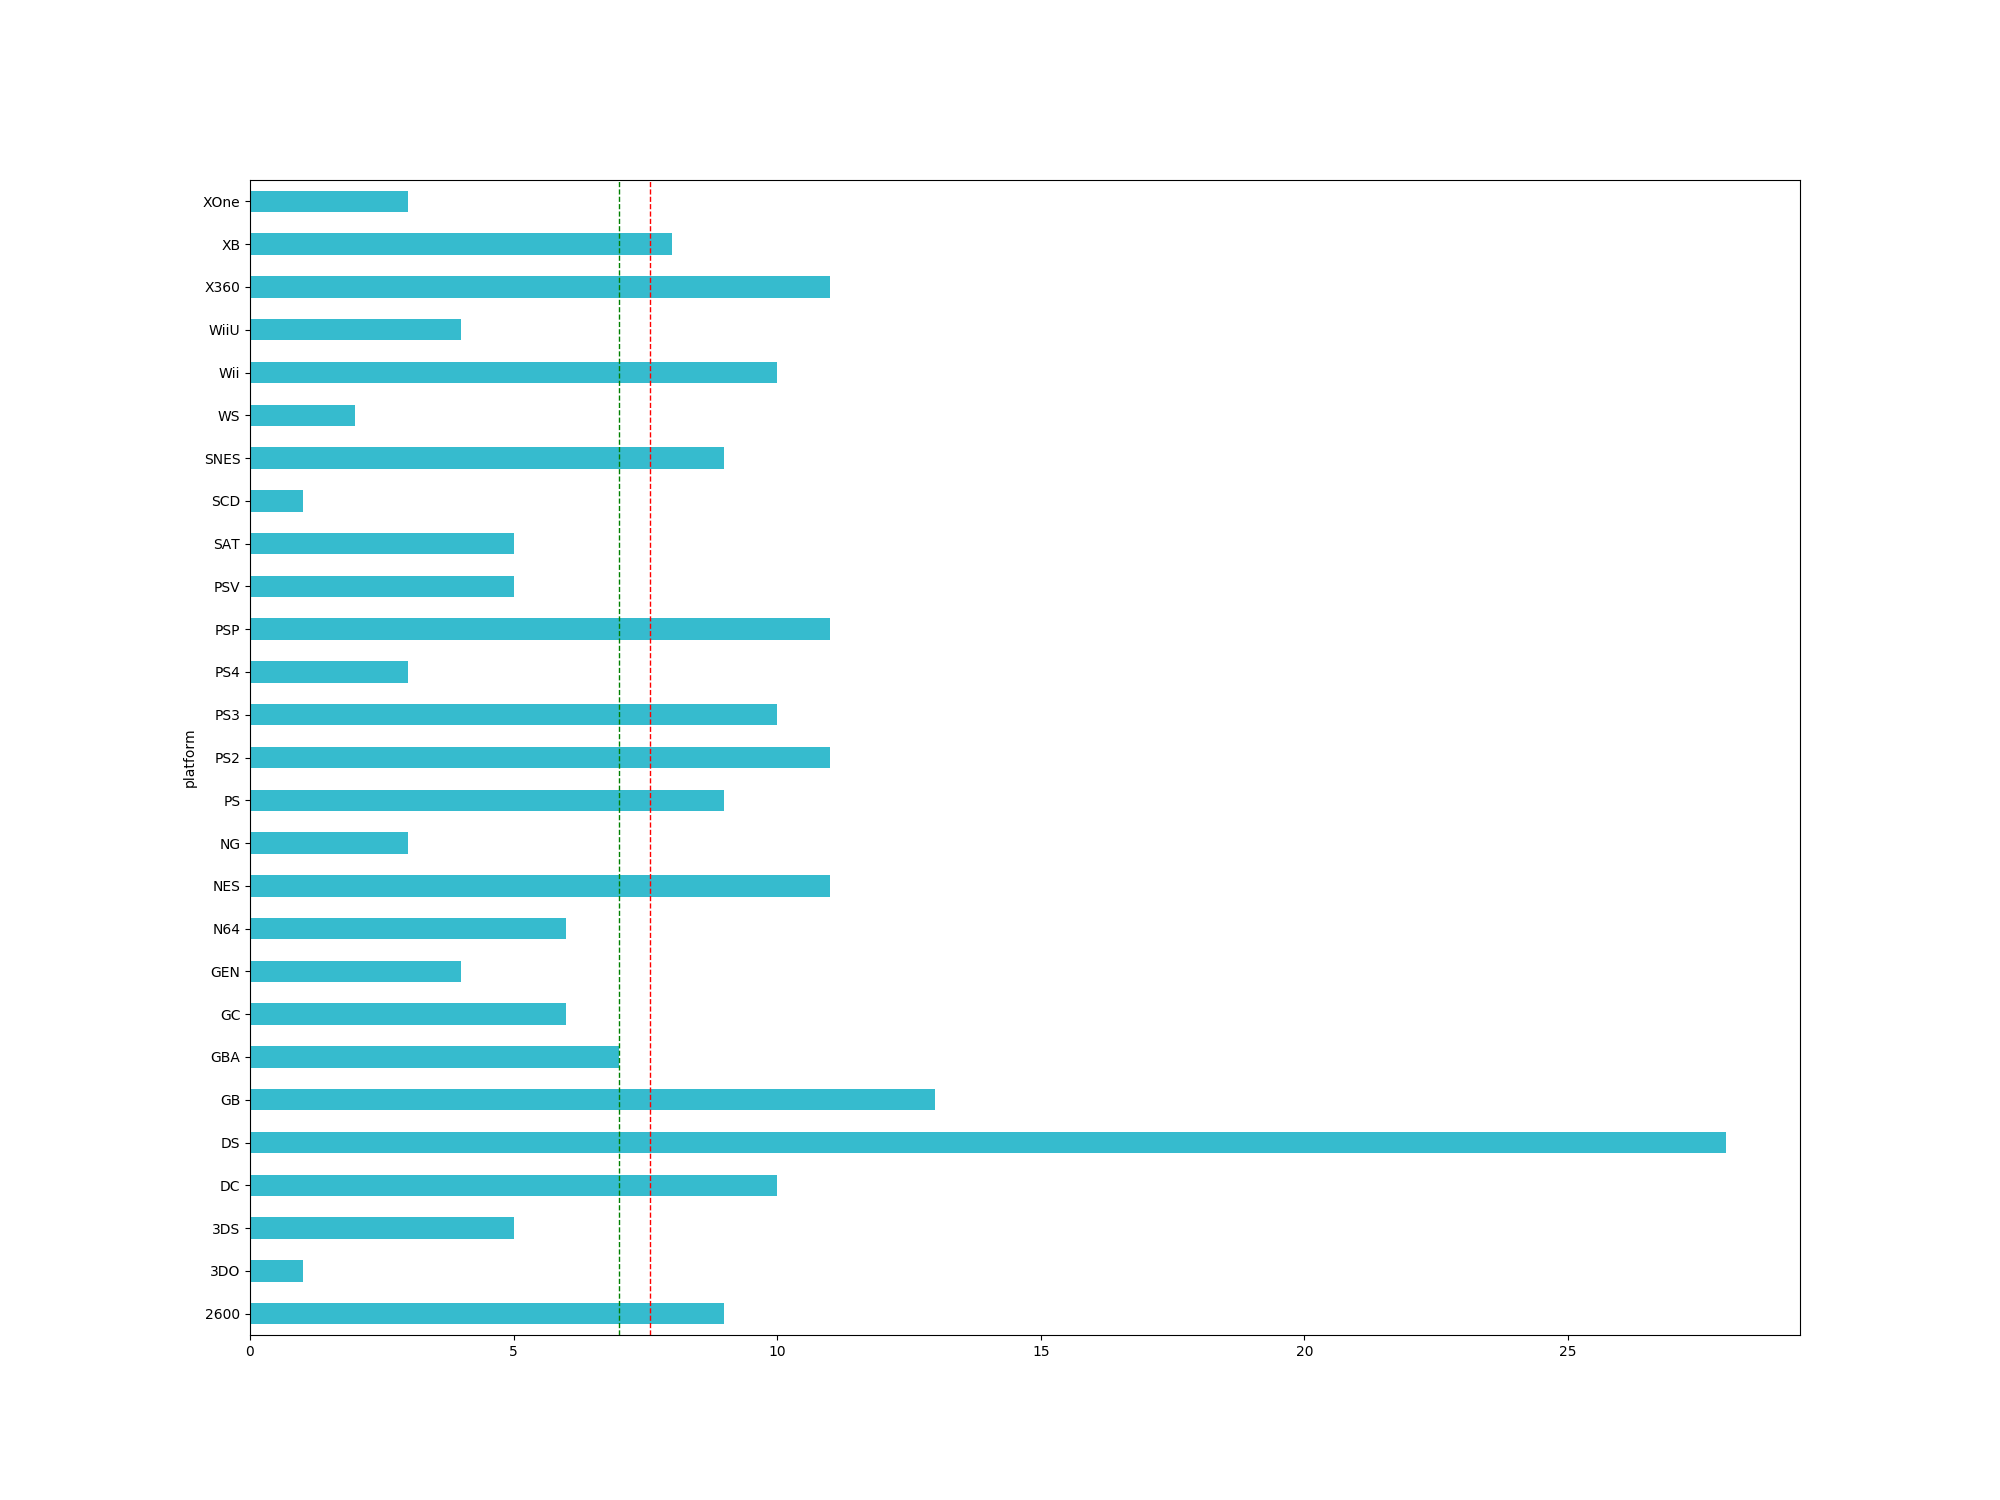

In [27]:
plot = platform_life_length.plot(kind='barh', figsize=(20,15), color='#36BBCE')
mean_line = plt.axvline(x=platform_life_length.mean(),linewidth=1, color='r', linestyle='--')
median_line = plt.axvline(x=platform_life_length.median(),linewidth=1, color='g', linestyle='--')

Как мы видим, средняя продолжительность жизни платформы составляет 7,6 лет, медианная - 7. 
<br/>Обратим внимание на то, что есть и рекордсмены: *DS*, *DC*, *GB* И *PS2*, которые и поднимают среднее по сравнению с медианой.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Значение средней продолжительности существования платформы приведено. Однако выводы ты делаешь по графику. Стоит также привести расчет данного значения. Подумай, стоит ли включать в расчет все платформы. Будут ли выбросы по продолжительности существования платформ?

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Расчет приведен. Однако не стоило в него включать актуальные на настоящий момент платформы. Период их жизни еще продолжается. 

</div>

<font size="3"><b>Определим какие платформы лидируют, а какие падают сегодня.</b></font>
<br/>И на основе этих данных выберем несколько потенциально прибыльных платформ.

Узнаем названия платформ, игры на которые продолжают выпускаться (т.е. платформ, которые сохраняют актуальность сегодня).

In [28]:
df[df['year_of_release'] == 2016.0].groupby('platform')['year_of_release'].max()

platform
3DS     2016.0
PC      2016.0
PS3     2016.0
PS4     2016.0
PSV     2016.0
Wii     2016.0
WiiU    2016.0
X360    2016.0
XOne    2016.0
Name: year_of_release, dtype: float64

Теперь посмотрим их динамику продаж за последнее время (c 2005 г. - выпуска *X360*).

<IPython.core.display.Javascript object>


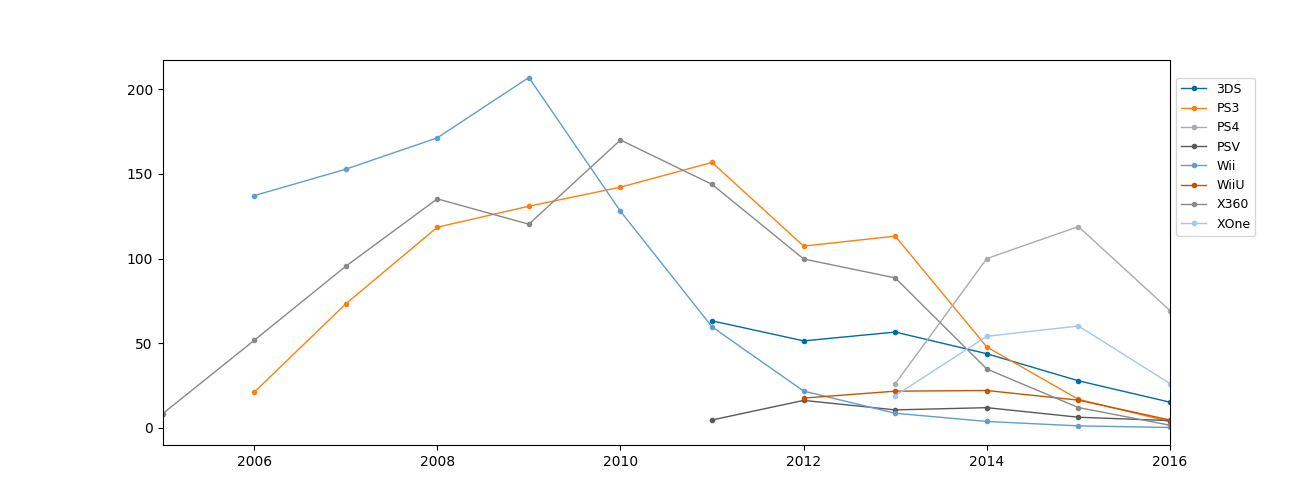

<function __main__.<lambda>(sel)>

In [29]:
%matplotlib notebook
plt.style.use('tableau-colorblind10')
actual_platforms = ['3DS', 'PS3', 'PS4', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

ax = plt.gca()
legend_list = []
platforms = actual_platforms
bbox_y = 0.97
legend_size = 9
for platform in platforms:
    df_to_plot = df.query('platform == @platform').query('year_of_release >= 2005')
    lines = df_to_plot.groupby('year_of_release')['total_sales'].sum().plot(x='year_of_release', y='total_sales',
                                                                        style='.-', kind='line', fontsize=10,
                                                                    linewidth=1, label=platform, ax=ax, figsize=(13,5))
    legend_list.append(platform)
ax.set_xlabel('')
   
ax.legend(legend_list, prop={'size':legend_size}, bbox_to_anchor=(1.0, bbox_y))

mplcursors.cursor(hover=True).connect("add", lambda sel: sel.annotation.set_text(sel.artist.get_label()))

На конец 2016 года у нас видны 3 лидера:
* <b>PS4</b>;
* <b>XOne</b>;
* <b>3DS</b>.

Хотя, стоит отметить, что количество выпускаемых игр для каждой платформы снижается. Это говорит нам о постепенном падении рынка.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Да, именно эти платформы мы и можем назвать перспективными на 2017 год. 

</div>

<font size="3"><b>Построим график «ящик с усами» по глобальным продажам каждой игры с разбивкой по платформам.</b></font>

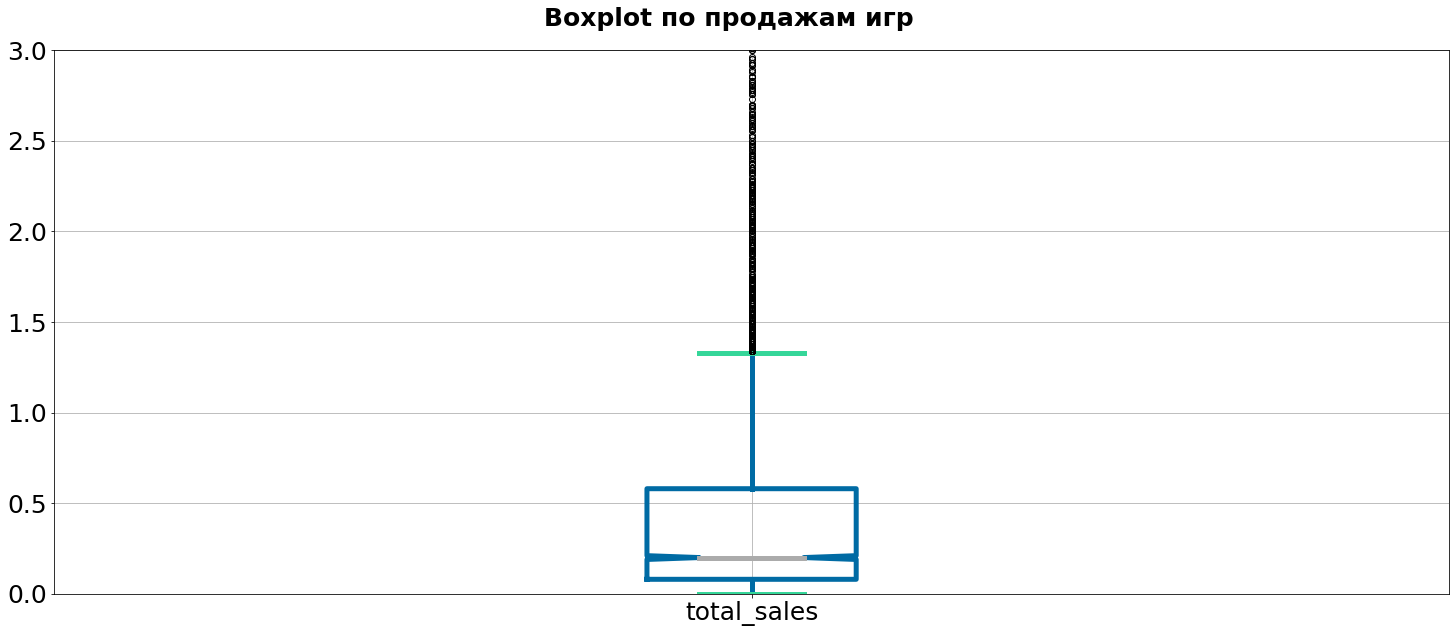

In [30]:
%matplotlib inline
df_perspective_platforms = df.query('platform in @actual_platforms')
ax = df_perspective_platforms.boxplot(column='total_sales', fontsize=25, figsize=(25,10),
                                         boxprops=dict(linestyle='-', linewidth=5, color='#36BBCE'),
                                         medianprops=dict(linestyle='-', linewidth=5),
                                         whiskerprops=dict(linestyle='-', linewidth=5),
                                         capprops=dict(linestyle='-', linewidth=5, color='#35D699'), 
                                         notch=True)
ax.set_xlabel('')
ax.set_title('')
ax.set_ylim([0,3])
plot_title = plt.suptitle('Boxplot по продажам игр', y=0.94, fontsize=25, fontweight='bold')

В среднем, продажи игр составляют до 1,2 млн долларов. Медиана - 0,2 миллиона долларов.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Актуальный период не назван. Выдели его и анализируй в дальнйешем только актуальные данные. Учти, что большей части платформ уже нет в 2016 году, в построении прогноза на 2017 год они нам не помогут. Нам важно рассматривать только конечный на данный момент интервал развития игровой индустрии. 

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Ок, через актуальные платформы мы также можем пойти и выделить актуальные данные для дальнейшего анализа.  

</div>

<font size="3"><b>Посмотрим на boxplot в разрезе платформ.</b></font>

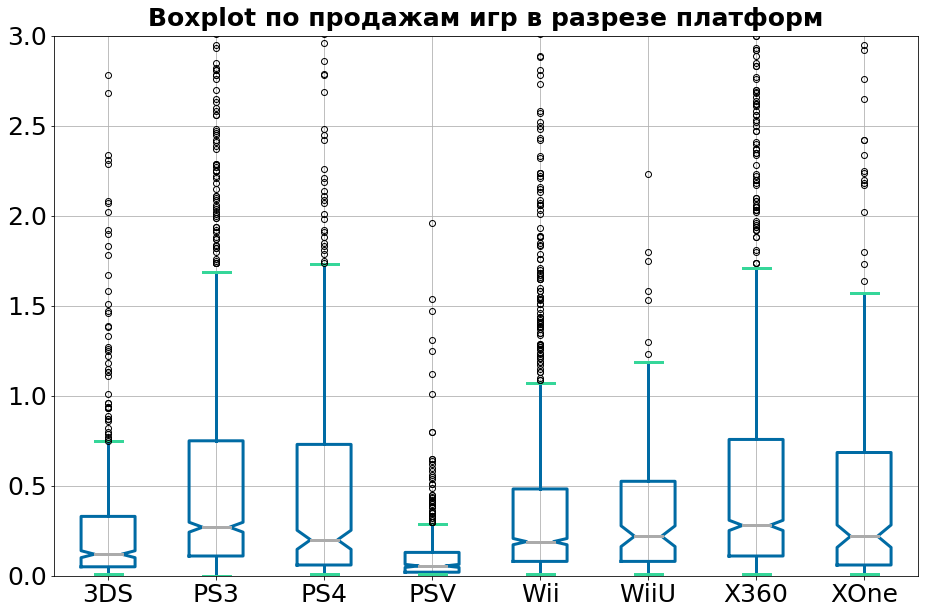

In [31]:
df_query = df.query('platform in @actual_platforms')
by_column = 'platform in @actual_platforms'.split()[0]
ax = df_query.boxplot(column='total_sales', by=by_column, fontsize=25, figsize=(15,10),
                                         boxprops=dict(linestyle='-', linewidth=3, color='#36BBCE'),
                                         medianprops=dict(linestyle='-', linewidth=3),
                                         whiskerprops=dict(linestyle='-', linewidth=3),
                                         capprops=dict(linestyle='-', linewidth=3, color='#35D699'),
                                         notch=True)
ax.set_xlabel('')
ax.set_title('')
plot = ax.set_ylim([0,3])
plot_title = plt.suptitle('Boxplot по продажам игр в разрезе платформ', y=0.94, fontsize=25, fontweight='bold')

Медиана варьируется от *0,2* до *0,25* млн долларов.<br/>
Верхняя граница предела у *PS3* и *X360* - на уровне *1,7* млн долларов.<br/>
У остальных - от *1* до *1,5* миллионов долларов.<br/>

В чем-то разница показателей обусловлена продолжительностью присутствия платформы на рынке (*Wii*, *PS3* и *Xbox* уже сильно старше всех), в чем-то по большому счету популярностью (*PS4*).

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>
 
Подумай, из-за чего формируется разница между платформами. Старайся не только описывать результат, но и трактовать его. 

</div>

<font size="4"><b>Теперь изучим влияние на продажи внутри платформ отзывов пользователей и критиков на примере PS2.</b></font>

<font size="3"><b>Диаграмма рассеяния общей суммы продаж игры от отзывов критиков.</b></font>

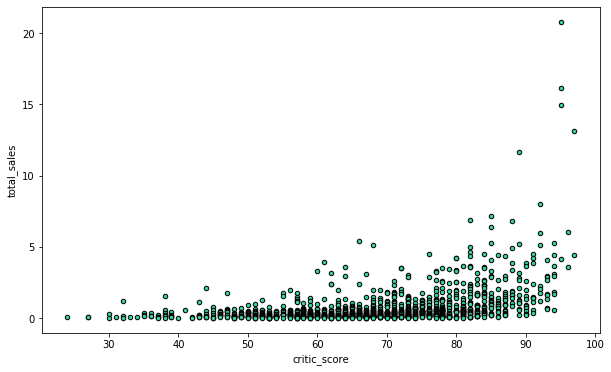

In [32]:
plot = df[(df['platform'] == 'PS2') & (df['critic_score'] > 0)].plot(kind='scatter', x='critic_score', y='total_sales', ec='black', figsize=(10,6), color='#35D699')

На данной диаграмме можно наблюдать: с увеличением оценки увеличиваются продажи. Что, впрочем, и логично.

<font size="3"><b>Диаграмма рассеяния общей суммы продаж игры от отзывов пользователей.</b></font>

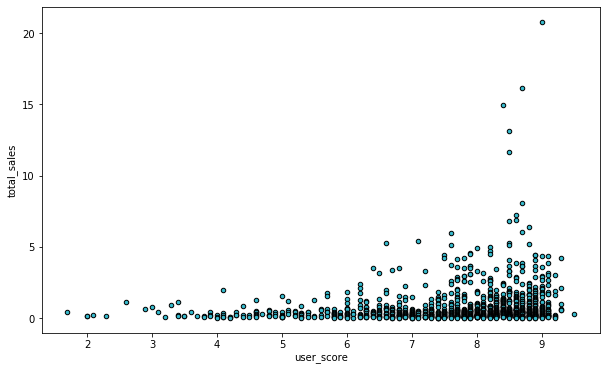

In [33]:
plot = df[(df['platform'] == 'PS2') & (df['critic_score'] > 0)].plot(kind='scatter', x='user_score', y='total_sales', ec='black', figsize=(10,6), color='#36BBCE')

Здесь мы видим почти то же самое: чем больше оценка пользователя - тем выше продажи.

<font size="3"><b>Изучим корреляцию между отзывами и продажами.</b></font>

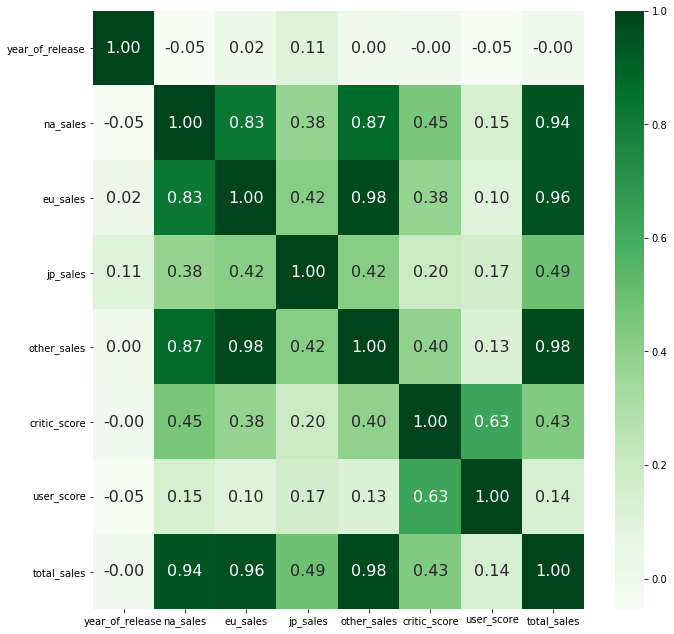

In [34]:
games_ps3 = df[(df['platform'] == 'PS3') & (df['critic_score'] > 0)].copy()
plot = plt.figure(figsize=(11,11))
plot_heat = sns.heatmap(games_ps3.corr(), annot=True, cmap="Greens", fmt='.2f', annot_kws={'size':16})

Как мы можем заметить, корреляция отзывов критиков и продаж очень высокая - *0,39*.<br/>
В то время как корреляция отзывов пользователей и продаж всего лишь *0,172*.<br/>
Вывод - на продажи сильнее всего влияют оценки критиков.

Убедимся в этом, посмотрев на корреляцию других платформ.

In [35]:
#Состав топ платформ: top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for platform_i in top_platforms:
    platformx = df[(df['platform'] == platform_i) & (df['user_score'] > 0)]
    print('Корреляция продаж и пользовательской оценки для',platform_i,':',platformx['user_score'].corr(platformx['total_sales']))

Корреляция продаж и пользовательской оценки для PS2 : 0.17286551112058213
Корреляция продаж и пользовательской оценки для X360 : 0.11445882978454185
Корреляция продаж и пользовательской оценки для PS3 : 0.12669133936341712
Корреляция продаж и пользовательской оценки для Wii : 0.11241436067003169
Корреляция продаж и пользовательской оценки для DS : 0.13293777533153114
Корреляция продаж и пользовательской оценки для PS : 0.29797783612684925


Ситуация в общем аналогичная. Выделяется только *PS*.

In [36]:
for platform_i in top_platforms:
    platformx = df[(df['platform'] == platform_i) & (df['critic_score'] > 0)]
    print('Корреляция продаж и оценки критиков для',platform_i,':',platformx['critic_score'].corr(platformx['total_sales']))

Корреляция продаж и оценки критиков для PS2 : 0.39543454945454876
Корреляция продаж и оценки критиков для X360 : 0.3937358653072588
Корреляция продаж и оценки критиков для PS3 : 0.4324315685642061
Корреляция продаж и оценки критиков для Wii : 0.17755988806089948
Корреляция продаж и оценки критиков для DS : 0.23637945738859747
Корреляция продаж и оценки критиков для PS : 0.44563998586242454


Действительно, в отдельных случаях корреляция продаж и оценки критиков достигает внушительных значений (до 44,5). Здесь у нас есть 2 исключения: *Wii* и *DS*. Корреляция у них заметно меньше (в 2 раза).

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Результат получен. Подумай, чем он вызван. Здорово, что рассмотрены несколько платформ. 

</div>

<font size="3"><b>Пришло время изучить распределение игр по жанрам.</b></font>

Изобразим столбчатые диаграммы с количеством созданных игр каждого жанра и продажами.

In [37]:
%matplotlib inline

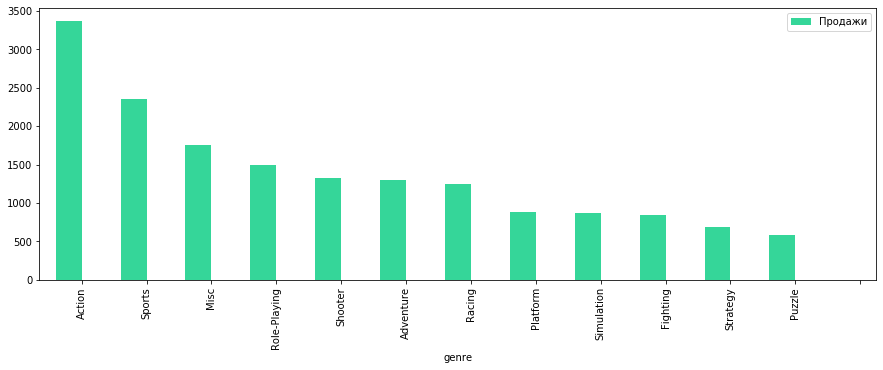

In [38]:
ax = plt.gca()
pivot = df.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ax=ax, width=0.4, color='#35D699', position=1)
plot_legend = ax.legend(['Продажи'])

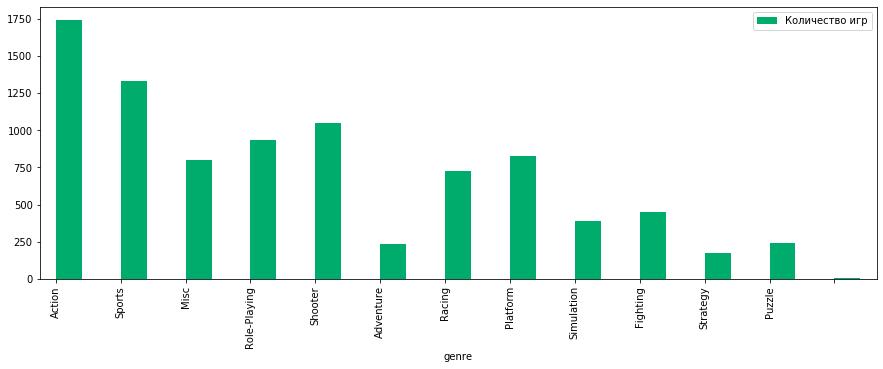

In [39]:
%matplotlib inline
ax = plt.gca()
plot2 = pivot['total_sales']
plot2.plot(kind='bar', figsize=(15,5), ax=ax, width=0.4, color='#00AC6B', position=0)
plot_legend = ax.legend(['Количество игр'])

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Не стоит на одном графике отображать число проданных игр и выручку. Данные параметры измеряются в разных единицах измерения. Каждый график стоит вынести на свои оси. 

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

👍 

</div>

Лидер по количеству игр и продаж - жанр <b>Action</b>. Сразу за ним следует жанр <b>Sports</b> и <b>Misc</b>.<br/>
Можно заметить, что нередко соотношение продаж и количества созданных игр между жанрами сильно различвается. Это говорим нам о разнице (порой существенной) в средней цене между жанрами, что, в свою очередь, зачастую обусловлено разницей в цене производства.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Анализ популярности жанров проведен. Однако не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 

</div>

<br/><a name="4."></a>
<font size="6"><b>Этап 4. Портет пользователя регионов NA, EU, JP</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>

<font size="3"><b>Определим для пользователя каждого региона (*NA*, *EU*, *JP*):</b></font>
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг *ESRB* на продажи в отдельном регионе?

Создадим функцию для прорисовки графиков.

In [40]:
def top_in_regions_plot(groupby, region_sales, ax, top_num):
    pivot =  df.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:top_num]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': None, 'eu_sales': '#48036F', 'jp_sales': '#37DA7E'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

<font size="3"><b>Узнаем топ-5 самых популярных платформ в каждом регионе.</b></font>

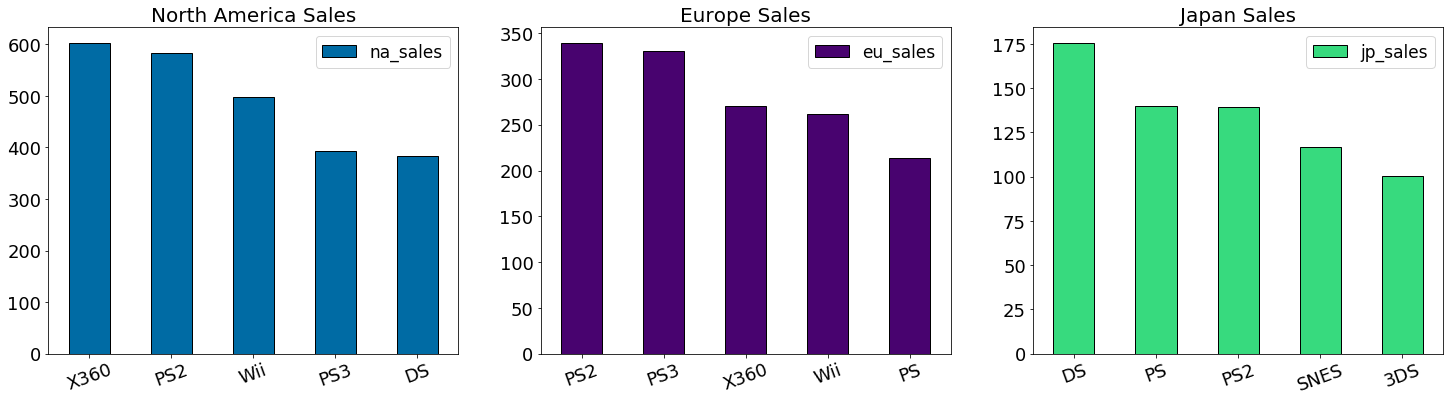

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0, 5)
top_in_regions_plot('platform', 'eu_sales', 1, 5)
top_in_regions_plot('platform', 'jp_sales', 2, 5)

В Северной Америке имеем 2 отчетливых лидера - *X360* и *PS2*.<br/>
В Европе лидируют *PS2* и *PS3*.<br/>
В Японии же проглядывается очевидный лидер - *DS*. Японцы,видимо, предпочитают больше местного производителя, о чем нам так же говорит состав их топа: *SNES* и *3DS*.

<font size="3"><b>Узнаем топ-5 популярных жанров в регионах.</b></font>

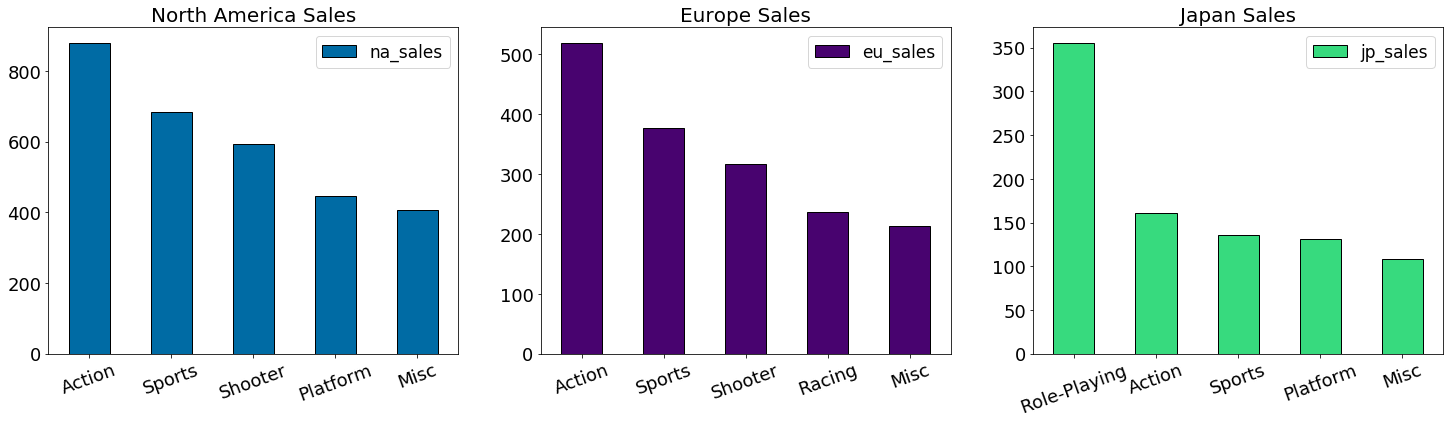

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0, 5)
top_in_regions_plot('genre', 'eu_sales', 1, 5)
top_in_regions_plot('genre', 'jp_sales', 2, 5)

В глаза сразу бросается схожесть распределений в Северной Америке и в Европе.<br/>
Лидер - *Action*, затем *Sports*, *Shooter*, после чего идет единственный отличающийся жанр *Platform(NA)/Racing(EU)* и замыкает топ *Misc*. Удивительно, что Platform и Racing имеет одинаковую пропорцию по отношению к другим.<br/>
Это всё говорит о схожести этих двух рынков. Перейдем теперь к Японии.<br/>
У Японии очевидна страсть к ролевым играм (отрыв более чем в 2 раза от ближайшего жанра *Action*). Все остальные жанры пользуются примерно одинаковой популярностью.

<font size="3"><b>Влияние рейтинга ESRB на продажи в каждом регионе.</b></font>

Пояснение значений оценки рейтинга:
* E: Для всех
* M: > 17 лет
* T: 13-19 лет
* E10+: >10 лет
* K-A: Для детей младшего возраста (сегодня называется EC)

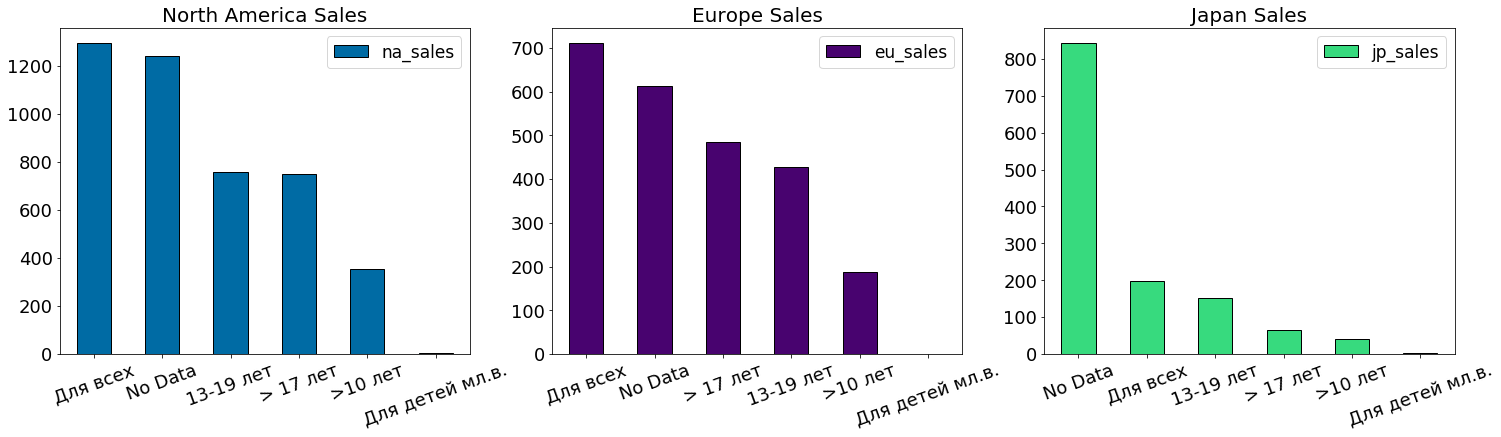

In [43]:
ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'K-A': 'Для детей мл.в.', '': 'No Data'}
df['ESRB_description'] = df['rating'].map(ESRB_dict)
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('ESRB_description', 'na_sales', 0, 6)
top_in_regions_plot('ESRB_description', 'eu_sales', 1, 6)
top_in_regions_plot('ESRB_description', 'jp_sales', 2, 6)

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Что-то не то с графиком. Исправь данную визуализацию.

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Отлично, теперь график сделан правильно.  

</div>

В Европе аудитория видеоигр заметно старше, чем в Северной Америке и Японии.<br/>
При этом в Японии аудитория самая молодая среди регионов.
<br/>Стоит обратить внимание на игр без рейтингов. Оно огромное, особенно в Японии. Интересно, как выглядело бы распределение, если бы всем дали рейтинг.

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Обрати внимание - ты не учитываешь игры без рейтинга. В результате огромная часть игр просто выпадает из анализа. Найди способ учесть их при группировке значений по рейтингу.
    
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Круто, ты заметил важную особенность японского региона - большая часть игр японского региона не имеет рейтинга. Как думаешь, почему так получается? 

</div>

<br/><a name="5."></a>
<font size="6"><b>Этап 5. Исследование статистических показателей</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>

Подсчитаем статистические показатели для пользовательского рейтинга и рейтинга критиков в разрезе различных жанров.

<font size="3"><b>Пользовательский рейтинг.</b></font>

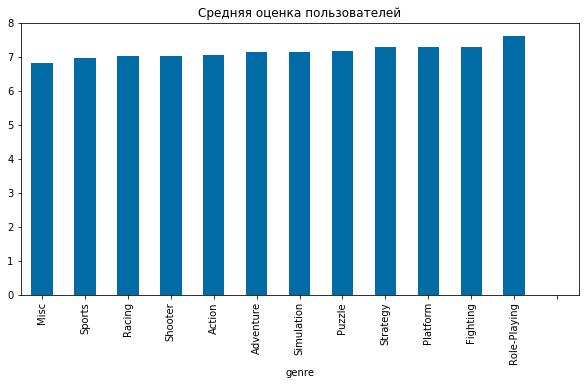

In [44]:
df_to_plot = df.groupby('genre')['user_score'].mean().sort_values(ascending = True)
plot = df_to_plot.plot(kind='bar', figsize=(10,5))
plot_title = plt.title('Средняя оценка пользователей')

In [45]:
user_genre = df.groupby('genre')['user_score'].std().sort_values(ascending = True)
user_genre_var = df.groupby('genre')['user_score'].var().sort_values(ascending = True)
print('STD', user_genre)
print('var', user_genre_var)

STD genre
Role-Playing    1.088687
Fighting        1.402651
Action          1.425394
Platform        1.513622
Shooter         1.518085
Puzzle          1.519739
Racing          1.546508
Misc            1.547207
Sports          1.611370
Simulation      1.621501
Strategy        1.634214
Adventure       1.655641
                     NaN
Name: user_score, dtype: float64
var genre
Role-Playing    1.185239
Fighting        1.967431
Action          2.031747
Platform        2.291052
Shooter         2.304582
Puzzle          2.309606
Racing          2.391688
Misc            2.393848
Sports          2.596515
Simulation      2.629266
Strategy        2.670654
Adventure       2.741148
                     NaN
Name: user_score, dtype: float64


Изучив все данные, можно смело сказать - *Role-Playing* и здесь выигрывает. У этого жанра самая высокая средняя оценка и самое низкое STD, что говорит о качестве или, возможно, повальном увлечении.

<font size="3"><b>Рейтинг критиков.</b></font>

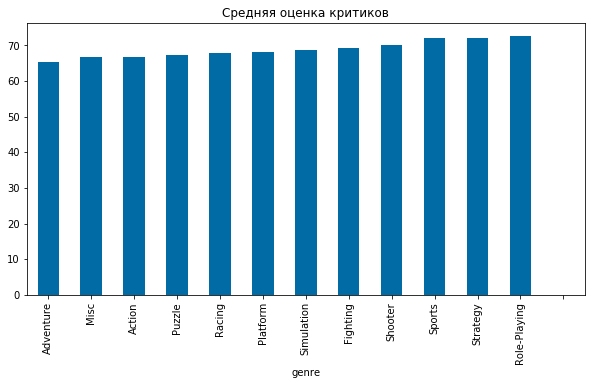

In [46]:
df_to_plot = df.groupby('genre')['critic_score'].mean().sort_values(ascending = True)
plot = df_to_plot.plot(kind='bar', figsize=(10,5))
plot_title = plt.title('Средняя оценка критиков')

Подсчитаем стандартное отклонение и дисперсию в различных жанрах.

In [47]:
critic_genre = df.groupby('genre')['critic_score'].std().sort_values(ascending = True)
critic_genre_var = df.groupby('genre')['critic_score'].var().sort_values(ascending = True)
print('STD', critic_genre)
print('var', critic_genre_var)

STD genre
Strategy        11.828475
Role-Playing    11.999835
Simulation      12.409558
Puzzle          12.735444
Platform        13.213760
Sports          13.878433
Adventure       13.920756
Misc            14.152649
Action          14.206877
Racing          14.248234
Fighting        14.280079
Shooter         14.552571
                      NaN
Name: critic_score, dtype: float64
var genre
Strategy        139.912829
Role-Playing    143.996029
Simulation      153.997119
Puzzle          162.191524
Platform        174.603443
Sports          192.610889
Adventure       193.787435
Misc            200.297473
Action          201.835362
Racing          203.012169
Fighting        203.920670
Shooter         211.777332
                       NaN
Name: critic_score, dtype: float64


У оценок критиков ситуация похожая, только *Strategy* имеет лучшую статистику, чем *Role-Playing*, хотя и несущественно.

<font size="3"><b>Познакомимся теперь с гистограммами для всех жанров.</b></font>

Создадим общую функцию для прорисовки распределения оценок.

In [48]:
from scipy.stats import norm
def genre_score(genre_i, score, ax):  
    df_to_plot = df[df['genre'] == genre_i].groupby(score)['name']
    df_to_plot_calculated = df_to_plot.count()
    title_dict = {'critic_score': 'Оценка критиков', 'user_score': 'Оценка пользователей'}
    color_dict = {'critic_score': '#3C9DD0', 'user_score': '#717BD8'}
    title_n = title_dict[score] + ' ' + 'жанра' + ' ' + genre_i
    plot = df_to_plot_calculated.plot(kind='bar',x='name', y=score, figsize=(25,6), ax=axes[ax],
                                      color=color_dict[score], title=title_n)
    plot.title.set_size(20)
    plot.set_xlabel('')
    plot.title.set_size(20)

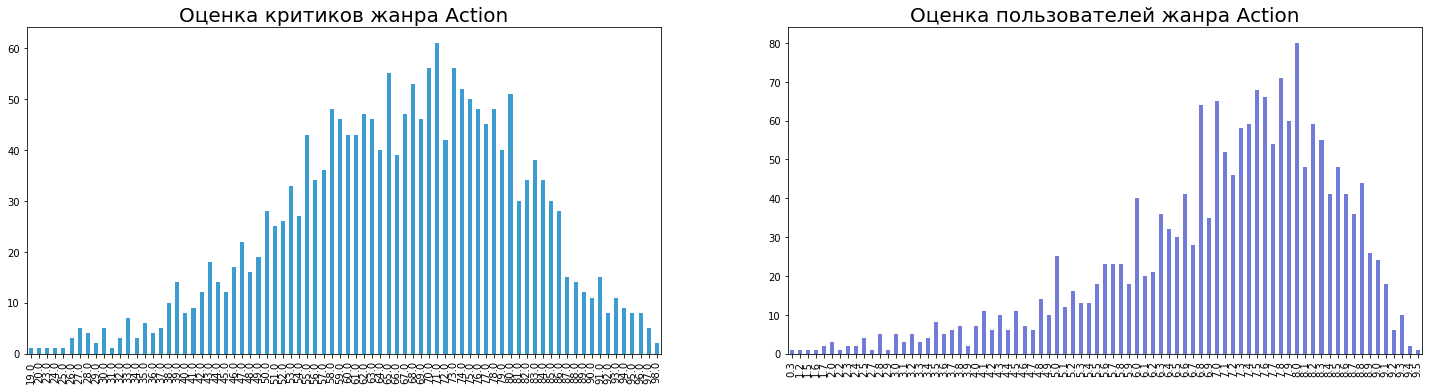

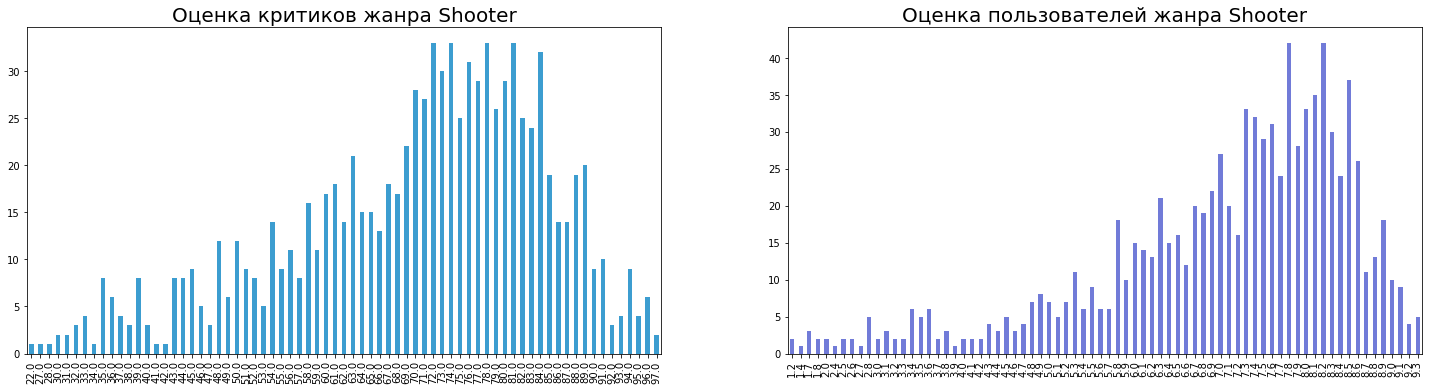

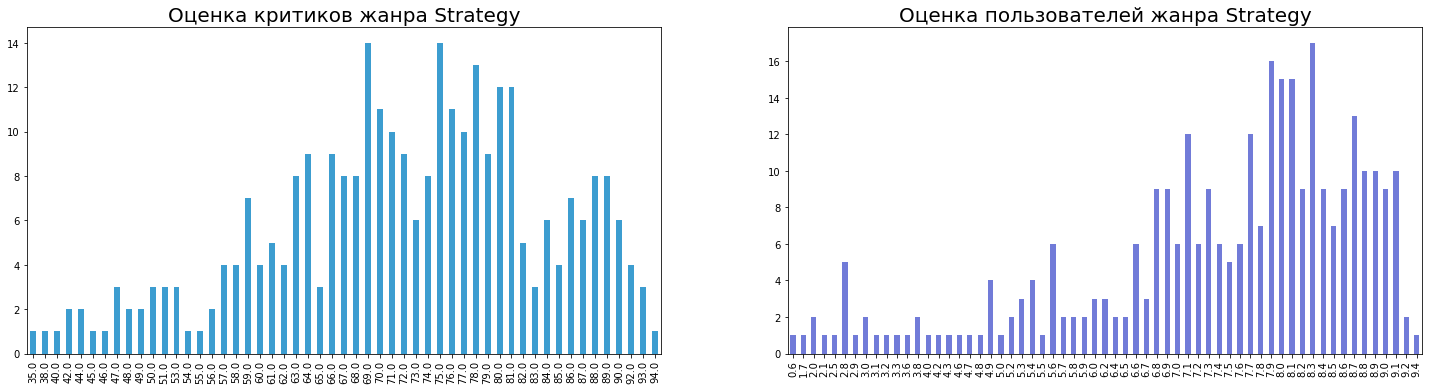

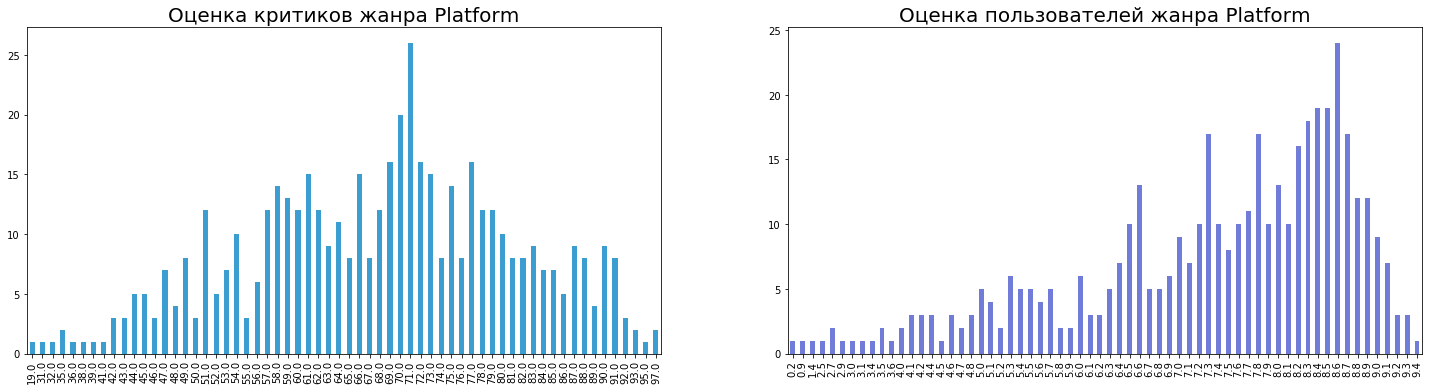

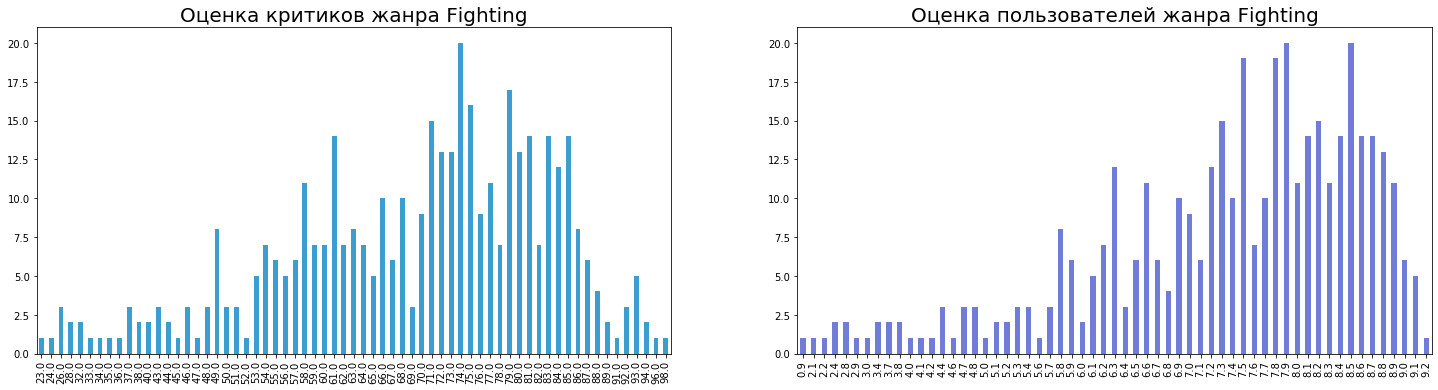

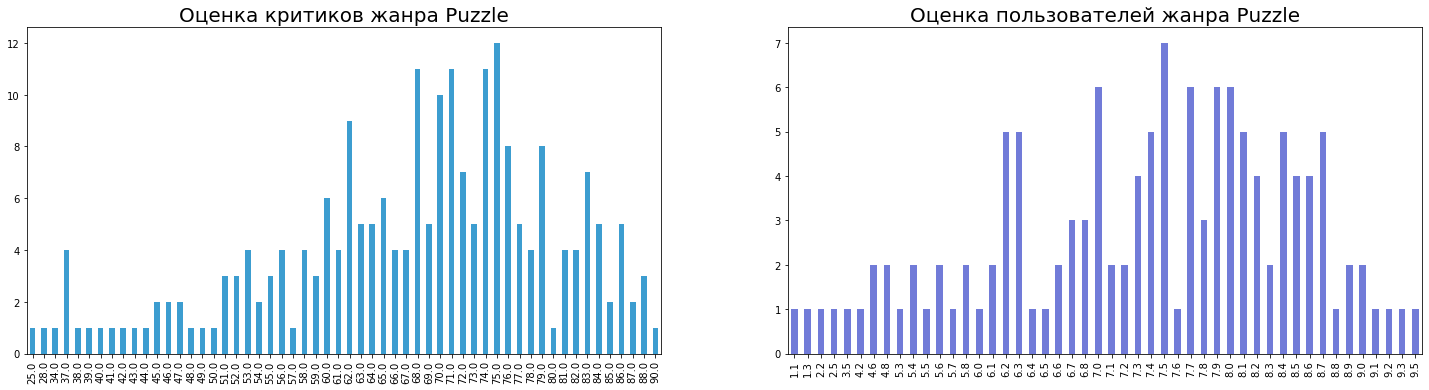

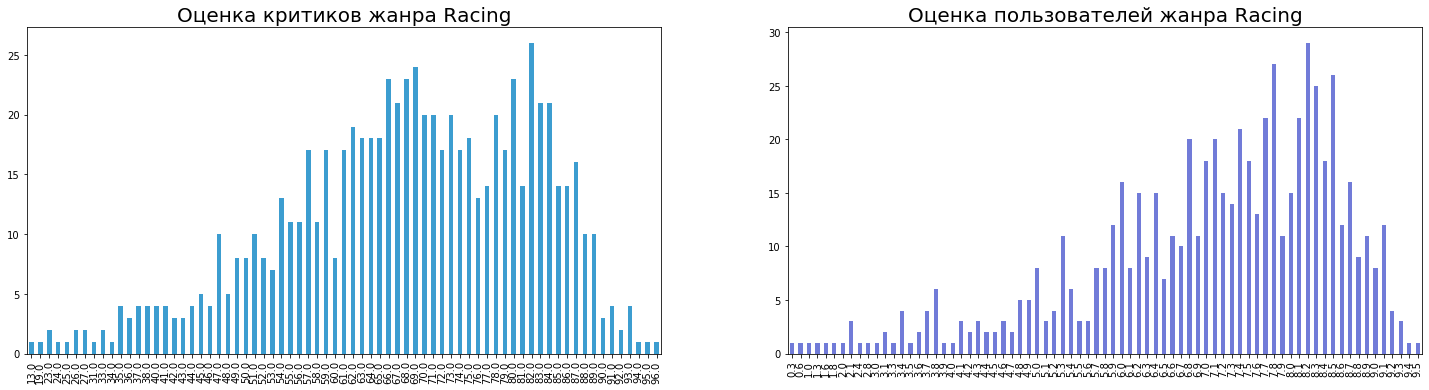

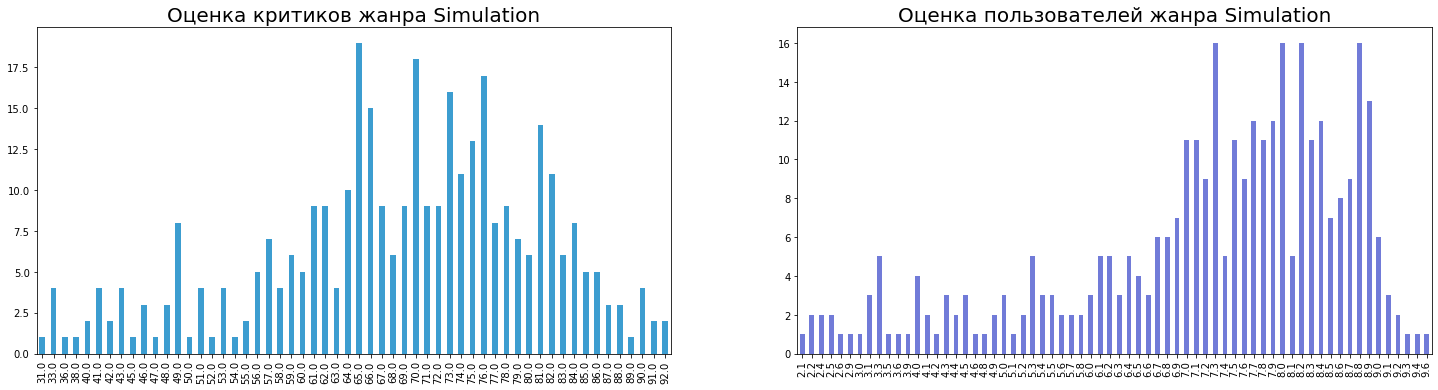

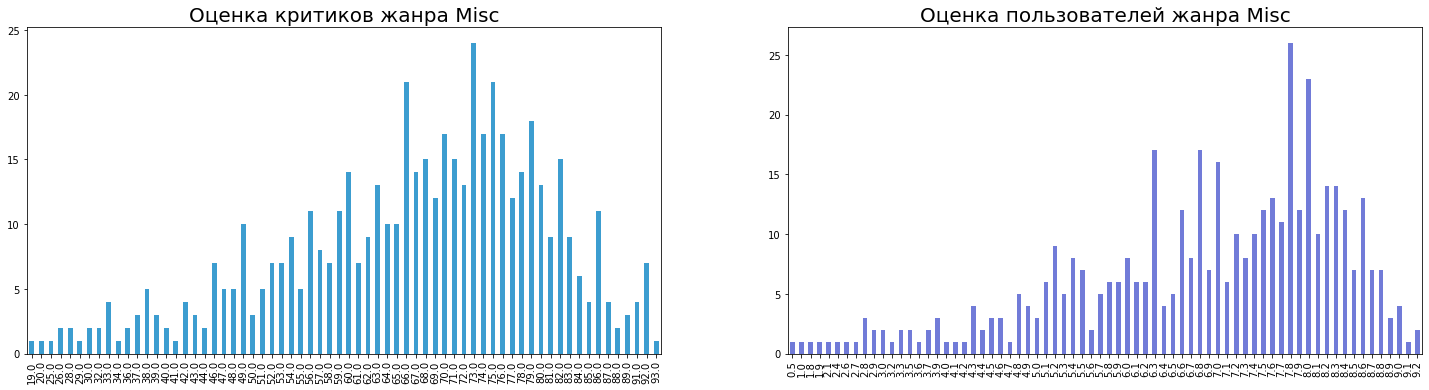

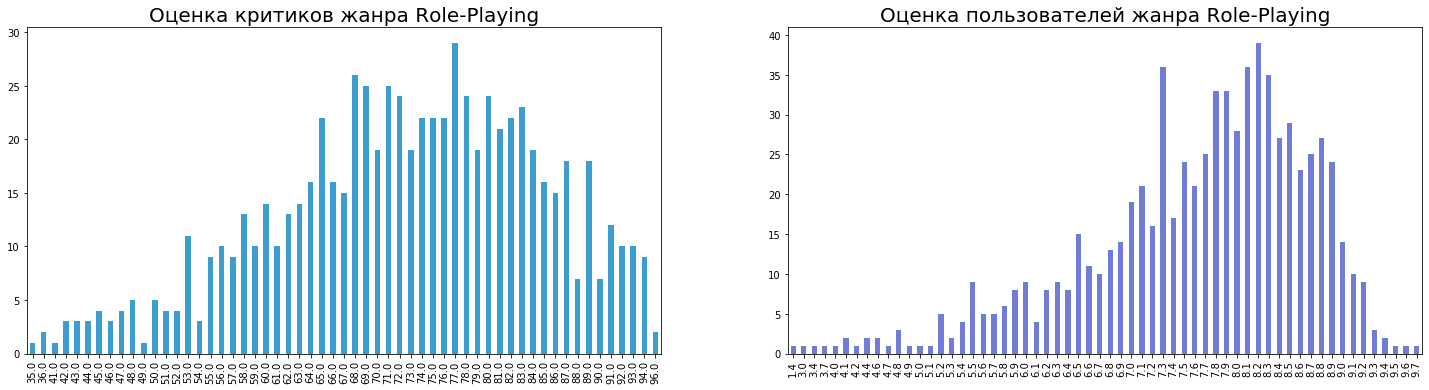

In [49]:
genre_list = ['Action', 'Shooter', 'Strategy', 'Platform', 'Fighting', 'Puzzle', 'Racing', 'Simulation', 'Misc', 'Role-Playing']
for genre_j in genre_list:
    fig, axes = plt.subplots(1, 2, figsize=(25,6))
    genre_score(genre_j, 'critic_score', 0)
    genre_score(genre_j, 'user_score', 1)

На графика наблюдается везде схожая форма распределения. Это *нормальное распределение* с сильным скосом вправо. Что и логично, ведь мы имеем в среднем хорошие средние оценки игр (извиняюсь за каламбур).

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Помимо расчета стат. показателей нас просят построить и гистограммы по отзывам критиков и пользователей. Т.е. по каждому жанру ты должен получить по 2 графика с распределениями отзывов критиков и пользователей. 
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Отлично, необходимые графики построены. Как думаешь, почему мы получаем скошенные распределения? Что значит хорошие оценки в среднем?

</div>

<br/><a name="6."></a>
<br/><a name="6."></a>
<font size="6"><b>Этап 6. Проверка гипотез</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>

**Проверим 2 гипотезы:<br/>
1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br/>
2) Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.**

Так как выборки независимы между собой, будем использовать t-критерий Стъюдента.<br/>
alpha=0.05

<font size="3"><b>Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.</b></font>

<b>Н0 (нулевая гипотеза)</b> - средние пользовательские рейтинги платформ <b>Xbox One</b> и <b>PC</b> одинаковые.<br/>
<b>Н1 (альтернативная гипотеза)</b> - средние пользовательские рейтинги платформ <b>Xbox One</b> и <b>PC</b> отличаются между собой.

In [50]:
xbox_one_ratings = df[(df['platform'] == 'XOne') & (df['user_score'] > 0)]['user_score']
pc_ratings = df[(df['platform'] == 'PC') & (df['user_score'] > 0)]['user_score']
stat, p = ttest_ind(xbox_one_ratings, pc_ratings)

print('t = {}\np-value = {:.10e}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')
print('\nДоверительный интервал PC',sms.DescrStatsW(pc_ratings).tconfint_mean())
print('Доверительный интервал XBOX',sms.DescrStatsW(xbox_one_ratings).tconfint_mean())

t = -4.368333815003015
p-value = 1.3896435534e-05

Пороговое значение alpha = 0.05

Доверительный интервал PC (6.954232521382893, 7.170702543552173)
Доверительный интервал XBOX (6.319452023663735, 6.723405119193406)


Отвергаем нулевую гипотезу! p-уровень значимости невероятно низок по сравнению с пороговым значением.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Гипотезы сформулированы и проверены верно.

</div>

<font size="3"><b>Гипотеза № 2: Средние пользовательские рейтинги жанров Action и Sports разные.</b></font>

<b>Н0 (нулевая гипотеза)</b> - средние пользовательские рейтинги жанров <b>Action</b> и <b>Sports</b> одинаковые.<br/>
<b>Н1 (альтернативная гипотеза)</b> - средние пользовательские рейтинги жанров <b>Action</b> и <b>Sports</b> отличаются между собой.

In [51]:
action_ratings = df[(df['genre'] == 'Action') & (df['user_score'] > 0)]['user_score']
pc_ratings = df[(df['genre'] == 'Sports') & (df['user_score'] > 0)]['user_score']
stat, p = ttest_ind(action_ratings, pc_ratings)

print('t = {}\np-value = {:.4f}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')
print('\nДоверительный интервал Action',sms.DescrStatsW(action_ratings).tconfint_mean())
print('Доверительный интервал PC',sms.DescrStatsW(pc_ratings).tconfint_mean())

t = 1.6259419280500857
p-value = 0.1041

Пороговое значение alpha = 0.05

Доверительный интервал Action (6.988693828874477, 7.119393602819511)
Доверительный интервал PC (6.86599760541468, 7.056395866933462)


Мы не можем отвергнуть нулевую гипотезу из-за высокого уровня p-значимости.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Проверка второй гипотезы также осуществлена без нареканий. Круто, что ты умеешь строить доверительные интервалы. 

</div>

<br/><a name="7."></a>
<font size="6"><b>Этап 7. Вывод</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>

Как мы выяснили, между оценками критиков и выручкой наблюдается огромная корреляция. Компании необходимо взять это на заметку.
<br/>Оценке же пользователей можно из-за низкой корреляции и вовсе внимания не придавать.
<br/>Компания "Стримчик" - международная. Поэтому важно обратить внимание на особенности предпочтений аудитории из разных регионов:
* В Японии аудитория молодая, в Европе она старше
* В Северной Америке и Европе предпочитаю жанры *Action, Sports, Shooter, Platform, Racing, Misc*
* В Японии так же, только *Role-Playing* жанр является абсолютным лидером.
* В Японии среди топа платформ 3/5 - японских (*DS, SNES, 3DS*), в *NA* и *EU* ситуация очевидная - *Xbox360, PS2, PS3, Wii* и *PS/DS*.

<br/>Так как у магазина задача сделать успешную ставку на будущий популярный продукт, ему стоит рассмотреть возможность выхода на мобильный гейминг. По нашим данным, гейминг на представленных платформах заметно снижается: пользователи переходят на мобильные платформы.

<br/>Если же рассматривать представленные платформы, то вот общие черты бестселлера для каждого региона:

<br/>**Япония:**
* Рейтинг *M* (или *E*)
* Жанр *Role-Playing*
* Под приставку *DS*

<br/>**Северная Америка:**
* Рейтинг *Е*
* Жанр *Action*
* Приставка - *Xbox360* (она уже есть у очень многих) или перспективная *PS3*

<br/>**Европа**
* Рейтинг *E* или *М*
* Жанр *Action*
* Приставка *PS3* (несмотря на то, что *PS2* ещё лидирует, это скорее всего ненадолго)

<br/>Ну и обязательный для всех элемент - **высокая оценка критиками**.

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Dct же назвать X360 или PS3 перспективными мы не можем. Ты говоришь тут, в целом, о самых популярных платформах за все время, но перспективные платформы у нас другие. Посмотри еще раз, ты отметил их в одном из блоков анализа. 

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Здорово, что по каждому пункту работы приведен вывод, а также то, что ты привел рекомендации для компании.    

</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Если тебе нравится тема визуализации, то можешь изучить методы библиотеки seaborn. Она позволяет строить довольно презентабельные графики.

Ты проделал большую работу, молодец! Критических замечаний немного. Однако с ними важно поработать. Также есть достаточное число желтых комментариев. Думаю, исправить их тебе не составит труда. Жду твою работу :)

</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера 2</b></font>

Помарки исправлены, и теперь работа выполнена хорошо. Ты здорово поработал, молодец. Поздравляю со сданным проектом. Надеюсь, он был интересен и познавателен. Успехов в дальнейшем пути :)

</div>